# Media Coverage of the Isreal Palestine Conflict in May 2021

## An analysis of framing the conflict in right wing media

### Outline

1. Obtaining data
2. Desciptive analysis of the coverage of the Israel-Palestine conflict
3. Framing of the conflict - a word-count approach

### 1. Obtaining data from the MediaCloud API

#### Initiate a client at Mediacloud

In [1]:
from dotenv import load_dotenv
load_dotenv()  # load config from .env file

True

In [2]:
import os, mediacloud.api
my_mc_api_key = 'bc00a1331e2f0dcaaf59ad7bd07a35bd094f332c8c7d1f3005dbc7002ea7bc3b' # read in API key
mc = mediacloud.api.MediaCloud(my_mc_api_key) # mc is my API client

#### Get stories from right wing media outlets in May 2021 (Fox News, The Telegraph, Washington Times)

In [3]:
# Specify the query
my_query = '"israel" and "palestine" and (media_id:1092 or media_id:655070 or media_id:1750 or media_id:1710822 or media_id:101)' # Fox News, The Telegraph, Washington Times
# Specify the date
import datetime
start_date = datetime.date(2021,5,1)
end_date = datetime.date(2021,5,31)
date_range = mc.dates_as_query_clause(start_date, end_date)

# Count the number of stories available with the specified search parameters
print("Number of stories published including 'Israel' and 'Palestine' by the specified newsoutlets in May 2021:",
      mc.storyCount(my_query, date_range)['count']) # function provided by MediaCloud for counting matching stories

Number of stories published including 'Israel' and 'Palestine' by the specified newsoutlets in May 2021: 101


In [4]:
# Get the stories
def all_matching_stories(mc_client, q, fq): # function provided by MediaCloud for getting all matching stories
    """
    Return all the stories matching a query within Media Cloud. Page through the results automatically.
    :param mc_client: a `mediacloud.api.MediaCloud` object instantiated with API key
    :param q: boolean query
    :param fq: date range query
    :return: a list of media cloud story items
    """
    last_id = 0
    more_stories = True
    stories = []
    while more_stories:
        page = mc_client.storyList(q, fq, last_processed_stories_id=last_id, rows=500, sort='processed_stories_id')
        print("  got one page with {} stories".format(len(page)))
        if len(page) == 0:
            more_stories = False
        else:
            stories += page
            last_id = page[-1]['processed_stories_id']
    return stories

stories = all_matching_stories(mc, my_query, date_range)

  got one page with 101 stories
  got one page with 0 stories


In [5]:
# Save the stories in a CSV file
import mediacloud.tags
for s in stories:
    theme_tag_names = ','.join([t['tag'] for t in s['story_tags'] if t['tag_sets_id'] == mediacloud.tags.TAG_SET_NYT_THEMES]) # assign a theme to each story
    s['themes'] = theme_tag_names
    
# write the CSV
import csv
fieldnames = ['stories_id', 'publish_date', 'title', 'url', 'language', 'ap_syndicated', 'themes', 'media_id', 'media_name', 'media_url']
with open('story-list-right.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames, extrasaction='ignore')
    writer.writeheader()
    for s in stories:
        try:
            writer.writerow(s)
        except:
            pass

In [6]:
# This is how the data looks in a pandas DataFrame
import pandas as pd
stories_df = pd.read_csv('story-list-right.csv') # this also serves as a check that saving the csv was successful
stories_df

,stories_id,publish_date,title,url,language,ap_syndicated,themes,media_id,media_name,media_url
0,1923277340,2021-05-06 09:25:59,Israel accuses Spanish woman of aiding banned ...,https://www.washingtontimes.com/news/2021/may/...,en,True,NaN,101,Washington Times,http://www.washingtontimes.com/
1,1924761484,2021-05-07 19:09:49,"Palestinians, Israel police clash at Al-Aqsa m...",https://www.foxnews.com/world/palestinians-isr...,en,False,NaN,1092,Fox News,http://www.foxnews.com/
2,1925020256,2021-05-08 03:16:06,Medics: 200 Palestinians hurt in Al-Aqsa clash...,https://www.washingtontimes.com/news/2021/may/...,en,True,NaN,101,Washington Times,http://www.washingtontimes.com/
3,1925413458,2021-05-08 14:23:50,More than 200 Palestinians hurt in Al-Aqsa cla...,https://www.foxnews.com/world/200-palestinians...,en,False,NaN,1092,Fox News,http://www.foxnews.com/
4,1927012599,2021-05-10 12:37:07,"UN council meets on Jerusalem violence, consid...",https://www.washingtontimes.com/news/2021/may/...,en,True,NaN,101,Washington Times,http://www.washingtontimes.com/
...,...,...,...,...,...,...,...,...,...,...
96,1946127986,2021-05-30 09:33:44,Recent Mideast clash highlights Iran backing o...,https://www.washingtontimes.com/news/2021/may/...,en,False,NaN,101,Washington Times,http://www.washingtontimes.com/
97,1946202309,2021-05-30 15:36:27,Rutgers student reacts to chancellor apologizi...,http://feeds.foxnews.com/~r/foxnews/national/~...,en,False,NaN,1092,Fox News,http://www.foxnews.com/
98,1946232280,2021-05-30 16:34:18,AP boss defends firing of pro-Palestinian writ...,https://www.foxnews.com/media/ap-boss-defends-...,en,True,NaN,1092,Fox News,http://www.foxnews.com/
99,1946306576,2021-05-30 19:50:39,BLM cofounder called for the end of Israel in ...,http://feeds.foxnews.com/~r/foxnews/national/~...,en,False,NaN,1092,Fox News,http://www.foxnews.com/


### 2. Descriptive analysis of the coverage of the Israel-Palestine conflict

#### Coverage over time

Text(0.5, 1.0, 'Number of stories about Israel and Palestine in selected right-wing media outlets - May 2021')

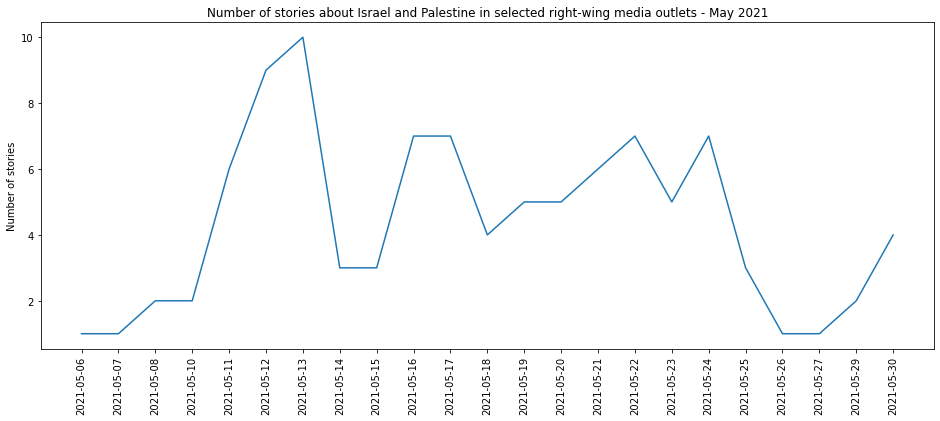

In [9]:
# Get the number of stories published each day
from collections import Counter
story_counter = Counter([date[:10] for date in stories_df.publish_date])

import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(story_counter.keys(), story_counter.values())
#plt.xticks(ticks = [i for i in range(31)],labels = [i for i in range(1,32)])
plt.xticks(rotation = 90)
#plt.xlabel("Date: May 2021")
plt.ylabel("Number of stories")
plt.title("Number of stories about Israel and Palestine in selected right-wing media outlets - May 2021")

#### Typical vocabulary of coverage

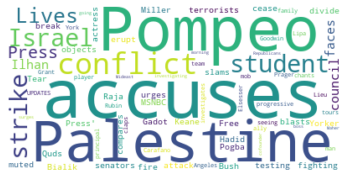

In [10]:
from wordcloud import WordCloud
text = " ".join(ttl.split()[1] for ttl in stories_df.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
#plt.figure(figsize=(16,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

### 3. Framing of the conflict - a word-count approach

#### Frequency of words

In [11]:
# Get the frequency of the 500 most frequently used words appearing in the articles (function from MediaCloud)
wordcount = mc.wordCount(my_query, date_range)
word_freq = {word['term']:word['count'] for word in wordcount} # save the output in a dictionary

In [12]:
word_freq

{'israel': 733,
 'israeli': 301,
 'palestinians': 276,
 'hamas': 219,
 'gaza': 157,
 'palestine': 136,
 'rockets': 103,
 'biden': 103,
 'attacks': 101,
 'violence': 96,
 'jerusalem': 85,
 'group': 85,
 'conflict': 85,
 'support': 80,
 'protesters': 67,
 'fired': 65,
 'arab': 65,
 'city': 64,
 'right': 61,
 'people': 61,
 'east': 61,
 'clashes': 60,
 'called': 60,
 'democrats': 59,
 'administration': 59,
 'iran': 58,
 'killed': 57,
 'reportedly': 56,
 'terrorist': 53,
 'police': 53,
 'new': 53,
 'united': 52,
 'national': 52,
 'forces': 52,
 'president': 50,
 'militants': 50,
 'including': 49,
 'days': 49,
 'week': 48,
 'targeting': 48,
 'military': 47,
 'jews': 47,
 'jewish': 45,
 'accused': 45,
 'defend': 42,
 'continue': 41,
 'building': 40,
 'strikes': 39,
 'time': 38,
 'middle': 38,
 'fighting': 38,
 'news': 36,
 'house': 35,
 'free': 35,
 'anti-semitic': 34,
 'war': 33,
 'trump': 33,
 'strip': 33,
 'organization': 33,
 'york': 32,
 'terror': 32,
 'rep': 32,
 'civilians': 32,
 'ten

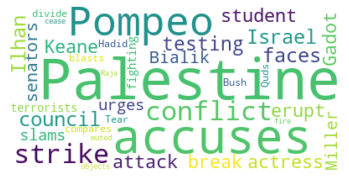

In [13]:
# Word cloud for the first half of May

half = int(101/2)
text = " ".join(ttl.split()[1] for ttl in stories_df.head(half).title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

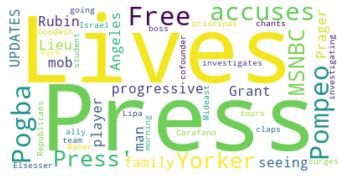

In [14]:
# Word cloud for the second half of May

text = " ".join(ttl.split()[1] for ttl in stories_df.tail(half).title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
#plt.figure(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

In [15]:
wordcount_by_date = {}

for i in range(1,31): # loop through each day
    start_date = datetime.date(2021,5,i)
    end_date = datetime.date(2021,5,i+1)
    date_range = mc.dates_as_query_clause(start_date, end_date)
    wordcount_d = mc.wordCount(my_query, date_range) # get the word count for the given day
    word_freq_d = {word['term']:word['count'] for word in wordcount_d} # save the output in a dictionary
    wordcount_by_date[i] = word_freq_d # append the obtained dictionary to a another, where the keys are days, values are word counts

In [16]:
# Get the number of neutral (and more extreme anti-Palestine) words used each day

neutral_w_by_day = {}

for day in wordcount_by_date:
    
    neutral_w_count = 0
    
    if 'dispute' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['dispute']
    if 'disputes' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['disputes']
    if 'disputed' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['disputed'] # for "disputed territories"     
    if 'contest' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['contest'] # for "contest grounds"
    if 'clash' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['clash']
    if 'clashes' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['clashes']   
    if 'terrorist' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['terrorist'] # anti-Palestine
    if 'terrorists' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['terrorists']
    if 'extremist' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['extremist'] # anti-Palestine
    if 'extremists' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['extremists']    

    neutral_w_by_day[day] = neutral_w_count
    
    
# Get the total number of words each day - to use for normalisation

w_by_day = {}

for day in wordcount_by_date:
    w_by_day[day] = sum(wordcount_by_date[day].values())
    
    
# Get normalised word count by dividing the number of "neutral" words by the number of all words that day

nw_prop = []
for nw, w in zip(neutral_w_by_day.values(), w_by_day.values()):
    try:
        nw_prop.append(nw / w)
    except:
        nw_prop.append(0)

Text(0.5, 1.0, "Trend of the use of 'pro-Israel' words in selected right wing newsoutlets - May 2021")

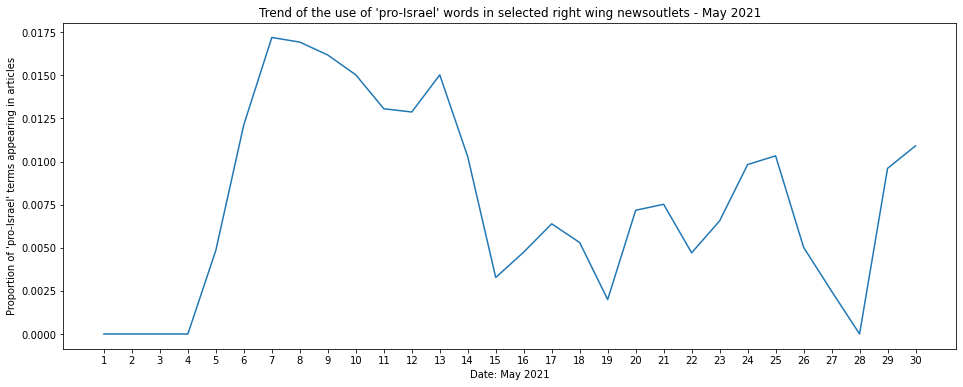

In [30]:
plt.figure(figsize=(16,6))
plt.plot(neutral_w_by_day.keys(), nw_prop)
plt.xticks(ticks = [i for i in range(1,31)],labels = [i for i in range(1,31)])
# plt.axvline(x = 9, color='r', label = "first voices of criticism")
plt.xlabel("Date: May 2021")
plt.ylabel("Proportion of 'pro-Israel' terms appearing in articles")
plt.title("Trend of the use of 'pro-Israel' words in selected right wing newsoutlets - May 2021")
# plt.legend()

In [20]:
# Get the number of neutral (and more extreme anti-Palestine) words used each day

pro_pal_w_by_day = {}

for day in wordcount_by_date:
    
    neutral_w_count = 0
    
    if 'discrimination' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['discrimination']
    if 'violence' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['violence']
    if 'bombing' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['bombing']
    if 'distruction' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['distruction']
    if 'displaced' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['displaced']
    if 'unprovoked' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['unprovoked']
    if 'attack' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['attack']
    if 'settlers' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['settlers']
    if 'settlment' in wordcount_by_date[day]:
        neutral_w_count += wordcount_by_date[day]['settlment']
        
    pro_pal_w_by_day[day] = neutral_w_count
    
    
# Get the total number of words each day - to use for normalisation

#w_by_day = {}

#for day in wordcount_by_date:
 #   w_by_day[day] = sum(wordcount_by_date[day].values())
    
    
# Get normalised word count by dividing the number of "neutral" words by the number of all words that day

propal_w_prop = []
for nw, w in zip(pro_pal_w_by_day.values(), w_by_day.values()):
    try:
        propal_w_prop.append(nw / w)
    except:
        propal_w_prop.append(0)

Text(0.5, 1.0, "Trend of the use of 'pro-Palestine' words in selected right wing newsoutlets - May 2021")

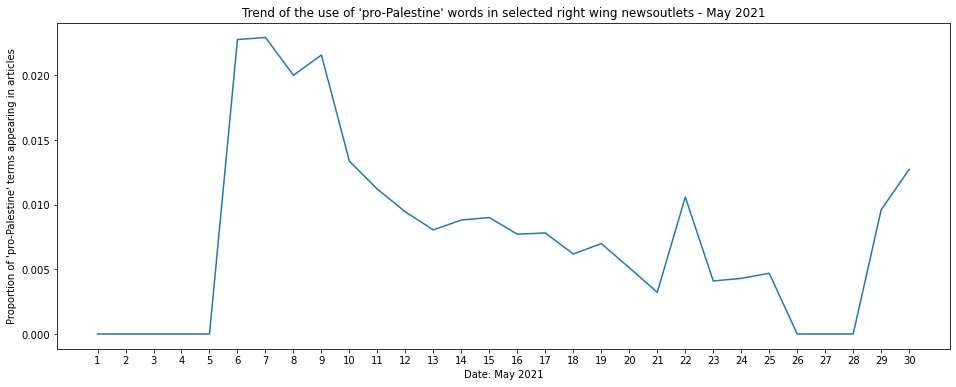

In [29]:
plt.figure(figsize=(16,6))
plt.plot(neutral_w_by_day.keys(), propal_w_prop)
plt.xticks(ticks = [i for i in range(1,31)],labels = [i for i in range(1,31)])
# plt.axvline(x = 9, color='r', label = "first voices of criticism")
plt.xlabel("Date: May 2021")
plt.ylabel("Proportion of 'pro-Palestine' terms appearing in articles")
plt.title("Trend of the use of 'pro-Palestine' words in selected right wing newsoutlets - May 2021")
# plt.legend()

__Topic modelling:__ which words are associated with one another?

C:\Users\Julcsi\anaconda3_2021_10_25\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Julcsi\anaconda3_2021_10_25\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


topic 0: conflict   palestine   israel   violence   jerusalem   republican   democrat   gaza   run   pounce
topic 1: attack   jewish   diner   angele   los   eric   disturbing   denounce   garcetti   lieu
topic 2: pro   palestinian   post   bella   medium   march   press   reporter   firing   viral
topic 3: city   semitism   new   york   official   grapple   subway   people   crime   anti
topic 4: �   hama   nikki   testing   haley   t   news   aoc   criticism   site
topic 5: anti   semitic   middle   east   mike   pompeo   biden   stance   radical   slam
topic 6: clash   israel   hama   aqsa   police   terrorist   democratic   state   terrorism   omar
topic 7: biden   obama   policy   carafano   smart   risky   jame   foreign   averse   risk
topic 8: fire   cease   palestinian   gaza   israeli   strike   house   call   diplomacy   white
topic 9: nyc   man   luca   lewis   player   knife   peace   mls   mob   palestinian


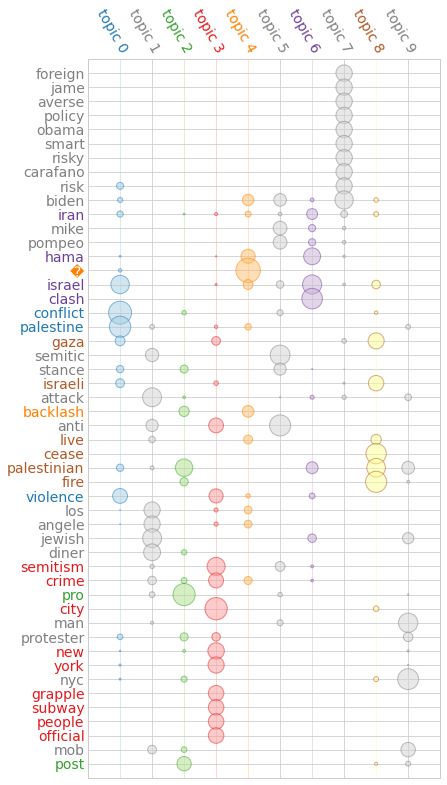

In [22]:
# get document-term-matrix with textacy
import textacy
from functools import partial

documents = list(stories_df['title'].str.lower()) # extract article titles

corpus = textacy.Corpus("en_core_web_sm",documents) # get the documents into corpus format

# from the corpus obtained above, extract ngrams and entities and save it in the docs_terms generator
docs_terms = (textacy.extract.terms(doc,
                                    ngs=partial(textacy.extract.ngrams, n=1, include_pos={"NOUN", "ADJ"}),
                                    ents=partial(textacy.extract.entities, include_types={ "ORG", "GPE", "LOC"})) for doc in corpus)

# from each doc in each corpus, turn the terms into strings and save them as the tokenized_docs generator
tokenized_docs = (textacy.extract.terms_to_strings(doc_terms, by="lemma") for doc_terms in docs_terms)

# build a document-term matrix from the tokenised docs
doc_term_matrix, vocab = textacy.representations.build_doc_term_matrix(tokenized_docs, tf_type="linear", idf_type="smooth")
id_to_term = {id_: term for term, id_ in vocab.items()}

# train the topic model using non-negative matrix factorization
import textacy.tm
model = textacy.tm.TopicModel("nmf", n_topics=10)
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)

# look at the top terms for every topic
for topic_idx, terms in model.top_topic_terms(id_to_term, top_n=10):
    print(f"topic {topic_idx}: {'   '.join(terms)}")
    
# visualize this information
_ = model.termite_plot(doc_term_matrix, id_to_term, n_terms=50, highlight_topics=[0,2,3,4,6,8])

__Word clouds:__ Observe change in the use of words by quarter for deeper qualitative insight on why the use of all words selected as reflecting an obvious viewpoint of the publisher are decreasing

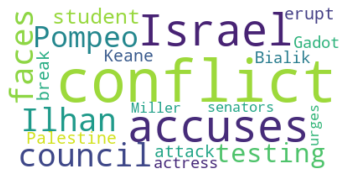

In [23]:
# Word cloud for the first quarter of May

quarter = int(101/4)
text_1 = " ".join(ttl.split()[1] for ttl in stories_df.iloc[:quarter].title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_1)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

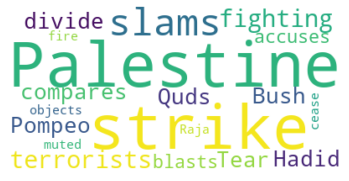

In [24]:
# Word cloud for the second quarter of May

text_2 = " ".join(ttl.split()[1] for ttl in stories_df.iloc[quarter:half].title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_2)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

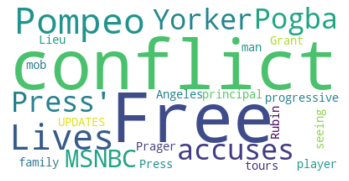

In [25]:
# Word cloud for the third quarter of May

text_3 = " ".join(ttl.split()[1] for ttl in stories_df.iloc[half:half+quarter].title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_3)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

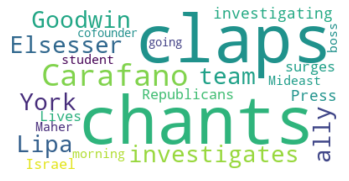

In [26]:
# Word cloud for the 4th quarter of May

text_4 = " ".join(ttl.split()[1] for ttl in stories_df.iloc[half+quarter:].title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_4)
# plt.figure(figsize=(8,8))
plt.imshow(word_cloud, interpolation='bilinear', aspect='equal')
plt.axis("off")
plt.show()

#### Frequency of mention of entities

In [27]:
# let's which organizations are being mentioned most in stories about "israel"
import mediacloud.tags
entities = mc.storyTagCount(my_query, date_range, tag_sets_id=mediacloud.tags.TAG_SET_CLIFF_ORGS)

In [28]:
print("Frequency of appearance of entities across articles: \n")
for ent in entities:
    print(ent['description'] + ':', ent['count'])

Frequency of appearance of entities across articles: 

Hamas: 2
Harvard: 1
CIA: 1
Associated Press: 1
NATO: 1
State Department: 1
AP: 1
CNN: 1
Rutgers: 1
State: 1
YouTube: 1
Fox News: 1
U.S. Air Force: 1
Harvard Law School: 1
Harvard University: 1
ADL: 1
BLM: 1
Warner Bros: 1
The Times: 1
New York Post: 1
HAMAS: 1
Rutgers University: 1
Mehr News Agency: 1
Hudson Institute: 1
Washington Examiner: 1
Washington Times: 1
Belfer Center: 1
PIJ: 1
Palestinian Islamic Jihad: 1
Rutgers University-New Brunswick: 1
Saraya al-Quds: 1
Palestine Islamic Jihad: 1
FLORIDA HOLOCAUST MUSEUM: 1
Black Lives Matter Global Network Foundation: 1
Fox News’ Houston Keane: 1
